# HOMEWORK 08-DEEP-LEARNING

This homework will classify the image of a dino or a dragon?

To get the dataset from kaggle:

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

## Dataset

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and test sets.

## Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:

- SGD(lr=0.002, momentum=0.8)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

### Import libraries

In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import datasets, layers, models


import pandas as pd
import numpy as np

import tqdm.auto

In [2]:
tf.__version__

'2.9.1'

In [173]:
class Config:
    img_size = 150
    # seed = 42
    learning_rate = 0.02
    momentum = 0.8
    batch_size = 20
    epochs = 10


In [159]:
datasetPath = './dataset/'
trainPath = datasetPath + 'train/'
testPath = datasetPath + 'test/'
config = Config()

In [128]:
img_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_directory(trainPath,
                                         target_size=(config.img_size, config.img_size), 
                                         batch_size=config.batch_size,
                                         class_mode='binary',
                                         shuffle=True
)

test_generator = val_gen.flow_from_directory(trainPath,
                                     target_size=(config.img_size, config.img_size),
                                     batch_size=config.batch_size,
                                     class_mode='binary',
                                     shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 1594 images belonging to 2 classes.


In [140]:
input_shape = (config.img_size, config.img_size, 3)
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), 
                       activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [141]:
optimizer = tf.keras.optimizers.SGD(learning_rate=config.learning_rate,
                             momentum=config.momentum)

loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [142]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

### Question 2

What's the total number of parameters of the model? You can use the summary method for that.

In [143]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_11 (Dense)            (None, 64)                11214912  
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [144]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
80/80 [==============================] - 14s 175ms/step - loss: 7.8953 - accuracy: 0.4774 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 2/10
80/80 [==============================] - 14s 170ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 3/10
80/80 [==============================] - 14s 173ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 4/10
80/80 [==============================] - 14s 171ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 5/10
80/80 [==============================] - 14s 173ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 6/10
80/80 [==============================] - 14s 174ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 7/10
80/80 [==============================] - 14s 172ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812

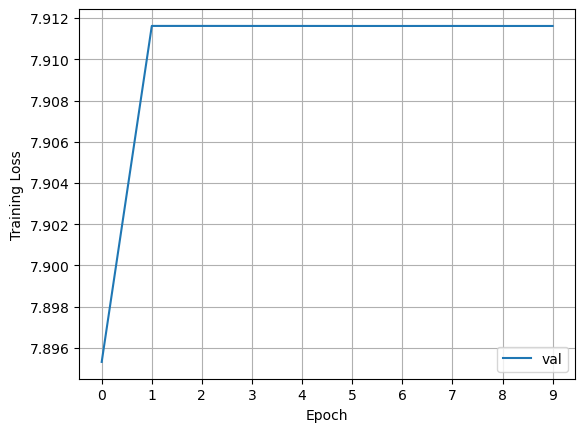

In [145]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='val')
plt.xticks(np.arange(10))
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid()
plt.legend()

In [146]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20


In [162]:
median_train_acc = np.median(history.history["accuracy"])
print('The median of the training accuracy is : %2.3f' %median_train_acc)

The median of the training accuracy is : 0.481


### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [161]:
std_train_loss = np.std(history.history["accuracy"])
print('The stadard deviation of the training loss is : %2.3f' % std_train_loss)

The stadard deviation of the training loss is : 0.001


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [174]:
class Augment:
    rotation_range = 40
    width_shift_range = 0.2
    height_shift_range = 0.2
    shear_range = 0.2
    zoom_range = 0.2
    horizontal_flip = True
    fill_mode = 'nearest'

### Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [155]:
Augmentor = Augment()
img_aug = ImageDataGenerator(rescale=1./255,
                             rotation_range=Augmentor.rotation_range,
                             width_shift_range=Augmentor.width_shift_range,
                             height_shift_range=Augmentor.height_shift_range,
                             shear_range=Augmentor.shear_range,
                             zoom_range=Augmentor.zoom_range,
                             horizontal_flip=Augmentor.horizontal_flip,
                             fill_mode=Augmentor.fill_mode)

train_generator_aug = img_aug.flow_from_directory(trainPath,
                                                  target_size=(config.img_size, config.img_size),
                                                  class_mode='binary',
                                                  batch_size=config.batch_size
)

Found 1594 images belonging to 2 classes.


In [166]:
history_aug = model.fit(train_generator_aug,
                        epochs=config.epochs,
                        validation_data=test_generator,
)                        

Epoch 1/10
80/80 [==============================] - 20s 252ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 2/10
80/80 [==============================] - 20s 251ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 3/10
80/80 [==============================] - 20s 251ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 4/10
80/80 [==============================] - 20s 250ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 5/10
80/80 [==============================] - 20s 252ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 6/10
80/80 [==============================] - 20s 251ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812
Epoch 7/10
80/80 [==============================] - 20s 250ms/step - loss: 7.9116 - accuracy: 0.4812 - val_loss: 7.9116 - val_accuracy: 0.4812

In [170]:
mean_val_loss_aug = np.mean(history_aug.history["val_loss"])
print("mean_val_loss %2.3f" % mean_val_loss_aug)

mean_val_loss 7.912


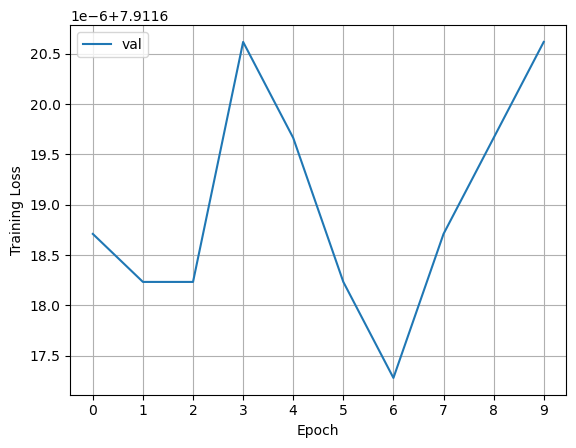

In [175]:
plt.plot(history_aug.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid()
plt.legend()

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [172]:
mean_val_acc_last_five_aug = np.mean(history_aug.history["val_accuracy"][5:])
print("mean_val_acc_last_five %2.3f" % mean_val_acc_last_five_aug)

mean_val_acc_last_five 0.481
